<a href="https://colab.research.google.com/github/bj-noh/lecture_nlp/blob/master/src/example/keras_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 라이브러리 Import
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten,MaxPooling2D,Dropout
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets, layers, models, losses, Model

import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 데이터셋 로드 및 분할(Train set/Test set)
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# 데이터 정규화
x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255

In [4]:
# VGG16의 입력에 맞게 3채널 형식으로 변경
x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)
x_train = tf.repeat(x_train, 3, axis=3)
x_test = tf.repeat(x_test, 3, axis=3)

In [5]:
# train, test 데이터 shape 확인
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 32, 32, 3) (60000,) (10000, 32, 32, 3) (10000,)


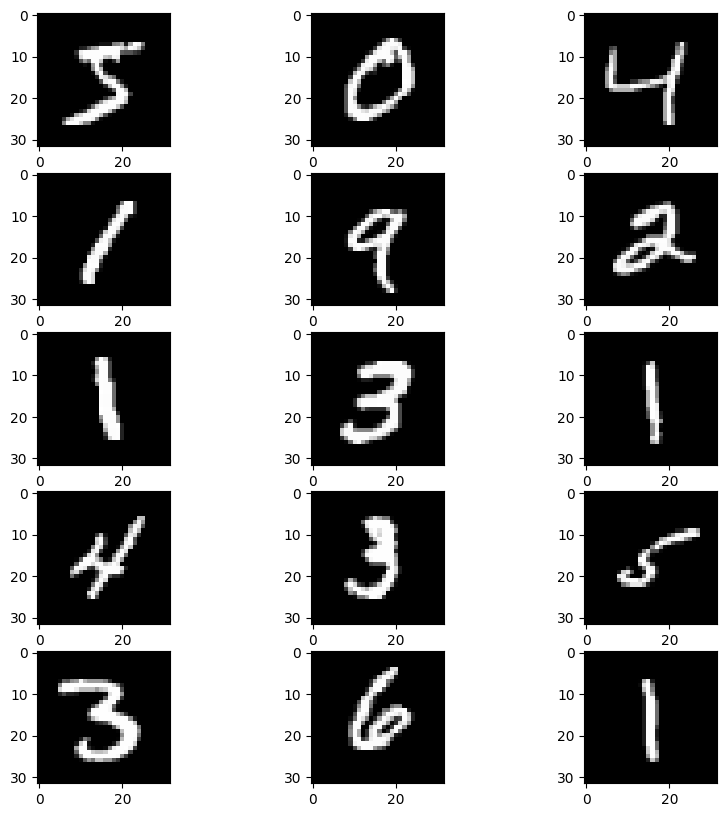

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1]


In [6]:
# 데이터 확인
plt.figure(figsize=(10, 10))
c = 0
for x in range(5):
    for y in range(3):
        plt.subplot(5,3,c+1)
        plt.imshow(x_train[c], cmap='gray')
        c+=1

plt.show()

print(y_train[:15])

In [7]:
# VGG16 모델 가져오기
model_VGG16 = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
for layer in model_VGG16.layers:
    layer.trainable = False

x = layers.Flatten()(model_VGG16.output)
x = layers.Dense(4096, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1000, activation='relu')(x)
predictions = layers.Dense(10, activation='softmax')(x)

In [8]:
# Optimizer와 Loss function 설정
model = Model(inputs = model_VGG16.input, outputs = predictions)
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [9]:
# 모델 학습 및 평가
history = model.fit(x_train, y_train, batch_size=64, epochs=10)
model.evaluate(x_test, y_test)

Epoch 1/10
938/938 [==============================] - 22s 14ms/step - loss: 0.2934 - accuracy: 0.9036
Epoch 2/10
938/938 [==============================] - 12s 13ms/step - loss: 0.1704 - accuracy: 0.9436
Epoch 3/10
938/938 [==============================] - 12s 13ms/step - loss: 0.1466 - accuracy: 0.9528
Epoch 4/10
938/938 [==============================] - 12s 13ms/step - loss: 0.1328 - accuracy: 0.9556
Epoch 5/10
938/938 [==============================] - 12s 12ms/step - loss: 0.1218 - accuracy: 0.9588
Epoch 6/10
938/938 [==============================] - 12s 12ms/step - loss: 0.1140 - accuracy: 0.9628
Epoch 7/10
938/938 [==============================] - 12s 13ms/step - loss: 0.1044 - accuracy: 0.9662
Epoch 8/10
938/938 [==============================] - 12s 12ms/step - loss: 0.1010 - accuracy: 0.9659
Epoch 9/10
938/938 [==============================] - 12s 12ms/step - loss: 0.0939 - accuracy: 0.9687
Epoch 10/10
313/313 [==============================] - 4s 11ms/step - loss: 0.0933

[0.09329792857170105, 0.970300018787384]

In [10]:
# 예측 값과 실제 값을 시각화하여 비교
predictions = model.predict(x_test)
pred_labels = np.argmax(predictions, axis=1)

313/313 [==============================] - 2s 7ms/step


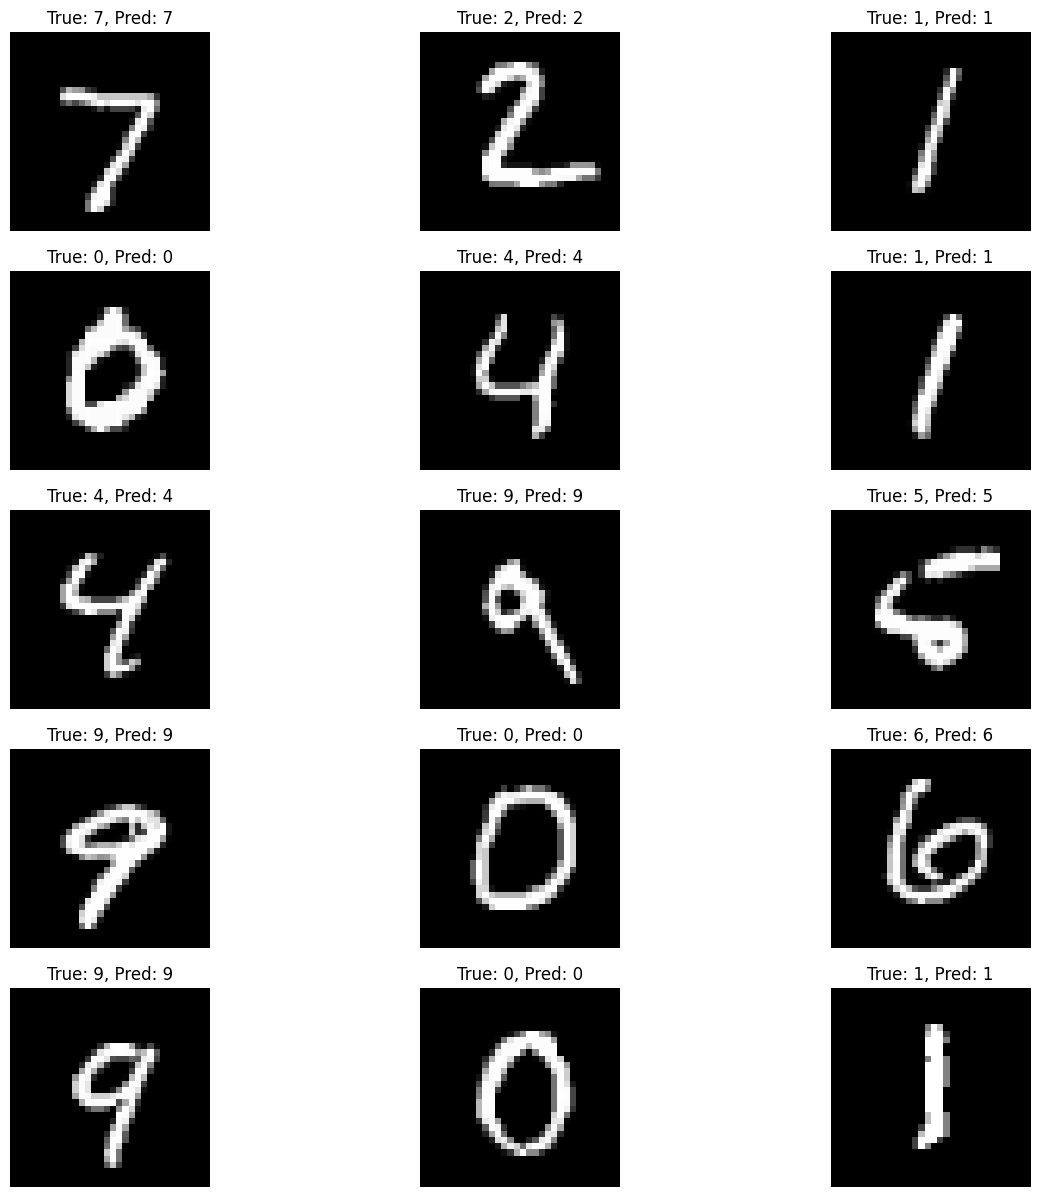

In [11]:
plt.figure(figsize=(15, 15))
for i in range(15):
    plt.subplot(5, 3, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"True: {y_test[i]}, Pred: {pred_labels[i]}")
    plt.axis('off')
plt.show()